#Bootcamp Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 3: Modelado supervisado en Machine Learning



¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 3! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Esta actividad constará de dos partes. Revisa con cuidado cada una de las instrucciones y procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

## Objetivos
* Diseñarás y aplicarás un modelo de regresión lineal y un modelo de regresión logística en el que:
  - harás _dummies_ a valores categóricos,
  - «splitear» _dataframe_,
  - estandarizarás conjuntos,  
  - entrenarás con conjunto de entrenamiento,
  - predecirás con conjunto de pruebas.
* Aplicarás cuadros de confusión y medirás la precisión.
* Graficarás mapas de calor a partir del cuadro de confusión.
* Utilizarás métricas MSE, RMSE y R2.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Primera parte

Descarga el archivo de la siguiente liga: https://drive.google.com/file/d/1mwbTl_m-r6oyKVl_ZHPOE4Io5tMohkr1/view?usp=sharing

Un equipo de Recursos Humanos te acaba de proporcionar el archivo que has descargado. En este se indican algunas características que ellos creen que influyen en el salario que buscan algunas personas que se postulan en empresas de tecnología.

Este equipo pide de tu apoyo para diseñar un modelo que pueda predecir cuánto pedirá cada postulante con base en las siguientes características:

- `Experiencia`: Años de experiencia en el área.
- `Posición`: Posición que busca; existen tres opciones:
  - `Analista`
  - `Coordinador`
  - `Gerente`
- `Hijos`: Número de hijos que tiene.
- `Casado`: ¿El postulante está casado?
  - `0`: No
  - `1`: Sí
- `Educación`: ¿Cuál es el grado máximo de estudios concluido? Existen tres opciones:
  - `Bachillerato`
  - `Licenciatura`
  - `Posgrado`
- `Salario`: Cantidad en pesos mexicanos que pide. Esta variable es la que se pretende predecir en este ejercicio.

### Criterios de evaluación:
- Modelar regresión lineal correctamente (**2 puntos**):
  - hacer _dummies_ a valores categóricos,
  - generar train_test_split,
  - estandarizar/reescalar conjuntos (solo si es necesario),
  - entrenar con conjunto de entrenamiento,
  - aplicar modelo,
  - predecir con conjunto de pruebas.

> **Nota:** Si alguno de los 3 últimos puntos anteriores (aplicar modelo, entrenar con conjunto de entrenamiento y predecir con conjunto de pruebas) no es realizado se descontará **un punto**.

- Aplicar por lo menos una métricas (**2 puntos**):
  - **MSE**,
  - **RMSE** o
  - **R2**.


# Análisis Exploratorio

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/rrhh.csv')
df.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario
0,0.5,Analista,4,1,Bachillerato,13540
1,5.6,Analista,2,0,Licenciatura,31240
2,11.7,Analista,1,0,Licenciatura,63880
3,5.2,Analista,2,1,Licenciatura,29960
4,7.2,Coordinador,2,1,Licenciatura,34710


In [ ]:
df.info()
# Vemos la información general de dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


In [ ]:
# Estadísticas descriptivas
df.describe()

,Experiencia,Hijos,Casado,Salario
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.416200,1.453000,0.595000,30787.060000
std,2.577612,1.208823,0.491138,11520.200049
min,0.100000,0.000000,0.000000,5630.000000
25%,4.600000,0.000000,0.000000,22557.500000
50%,6.400000,1.000000,1.000000,29470.000000
75%,8.100000,2.000000,1.000000,37922.500000
max,15.200000,4.000000,1.000000,83470.000000


In [ ]:
#Verificamos si existen valores nulos
df.isnull().sum()

,0
Experiencia,0
Posicion,0
Hijos,0
Casado,0
Educacion,0
Salario,0


No se observan valores nulos.

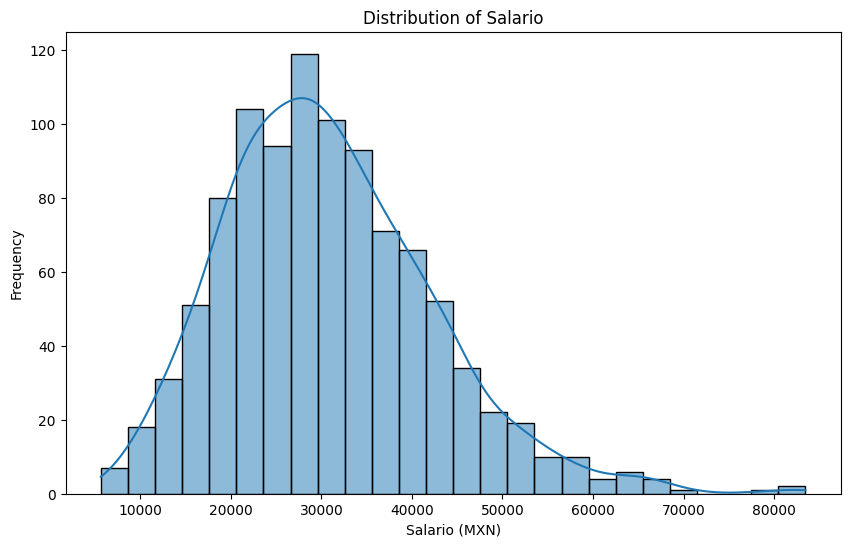

In [ ]:
# Distribución de la variable objetivo, en este caso : Salario.
plt.figure(figsize=(10, 6))
sns.histplot(df['Salario'], kde=True)
plt.title('Distribution of Salario')
plt.xlabel('Salario (MXN)')
plt.ylabel('Frequency')
plt.show()

Se observa que el histograma pareciera tener una distribución sesgada a la derecha, esto sugiere que la mayoría de los postulantes solicitan salarios en el rango inferior a medio, con menos postulantes solicitando salarios muy altos.

<ipython-input-55-9dc0002ed499>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Posicion', data=df, palette='viridis')
<ipython-input-55-9dc0002ed499>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Casado', data=df, palette='viridis')
<ipython-input-55-9dc0002ed499>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Educacion', data=df, palette='viridis', order=['Bachillerato', 'Licenciatura', 'Posgrado'])


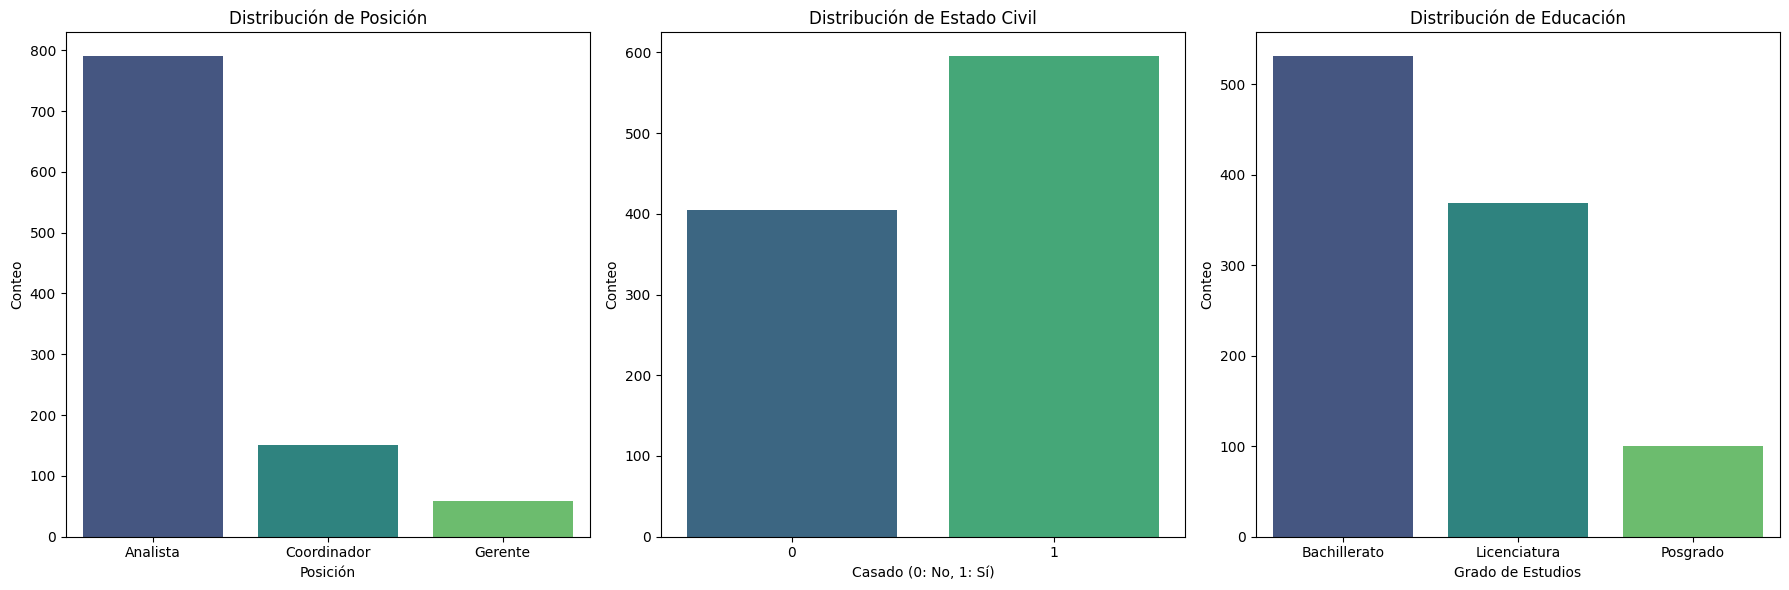

In [ ]:
# Distribución de variables categóricas
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.countplot(x='Posicion', data=df, palette='viridis')
plt.title('Distribución de Posición')
plt.xlabel('Posición')
plt.ylabel('Conteo')

plt.subplot(1, 3, 2)
sns.countplot(x='Casado', data=df, palette='viridis')
plt.title('Distribución de Estado Civil')
plt.xlabel('Casado (0: No, 1: Sí)')
plt.ylabel('Conteo')

plt.subplot(1, 3, 3)
sns.countplot(x='Educacion', data=df, palette='viridis', order=['Bachillerato', 'Licenciatura', 'Posgrado'])
plt.title('Distribución de Educación')
plt.xlabel('Grado de Estudios')
plt.ylabel('Conteo')

plt.tight_layout()
plt.show()

Podemos tener una visión general de la distribución de variables clave en el conjunto de datos.

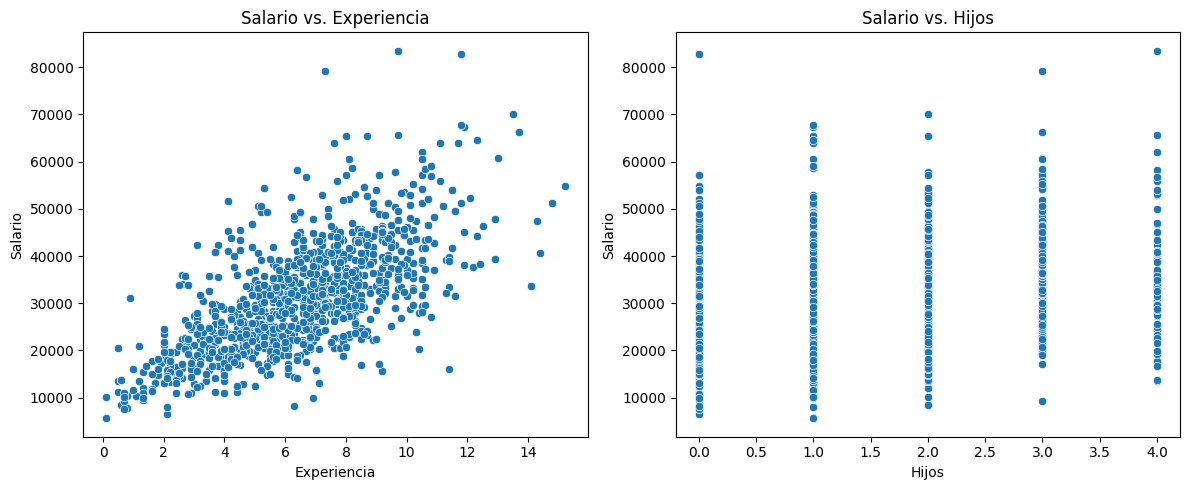

In [ ]:
# Visualizamos la relación entre variables numéricas y "Salario"
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Experiencia', y='Salario', data=df)
plt.title('Salario vs. Experiencia')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Hijos', y='Salario', data=df)
plt.title('Salario vs. Hijos')

plt.tight_layout()
plt.show()

Existe una relación lineal entre las variables "Experiencia" y "Salario, esto sugiere que la experiencia es un factor relevante a la hora de determinar el salario; mientras que la relación entre la variable "Hijos" y "Salario" no se muestra lineal, por lo que no es influyente.

# Procesamos los datos para la regresión lineal

In [ ]:
# Creamos dummy para variables categóricas "Posición" y "Educación"
df_processed = pd.get_dummies(df, columns=['Posicion', 'Educacion'], drop_first=True)

La variable "Casado" ya tiene valores 0 y 1, por lo que no se considera.

In [ ]:
if df_processed['Casado'].dtype == 'object':
    df_processed['Casado'] = df_processed['Casado'].astype(int)

In [ ]:
X = df_processed.drop('Salario', axis=1)
y = df_processed['Salario']

In [ ]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f"\nX_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")


X_train: (800, 7)
X_test: (200, 7)
y_train: (800,)
y_test: (200,)


In [ ]:
numerical_cols = ['Experiencia', 'Hijos']

Aquí excluimos la variable "Casado" ya que se encuentra como 0/1

In [ ]:
scaler = StandardScaler()

In [ ]:
# Ajustamos y transformamos el escalador en los datos de entrenamiento para columnas numéricas puras
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

In [ ]:
# Transformamos los datos de prueba
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [ ]:
print("\nX_train after scaling numerical features:")
print(X_train.head())
print("\nX_test after scaling numerical features:")
print(X_test.head())


X_train after scaling numerical features:
     Experiencia     Hijos  Casado  Posicion_Coordinador  Posicion_Gerente  \
512    -1.154752  1.301628       1                 False             False   
685    -0.311832  1.301628       0                 False             False   
997     1.872096 -1.201503       0                 False             False   
927    -0.158574 -1.201503       0                 False             False   
376     0.186257 -1.201503       0                 False             False   

     Educacion_Licenciatura  Educacion_Posgrado  
512                   False               False  
685                   False               False  
997                    True               False  
927                   False                True  
376                   False                True  

X_test after scaling numerical features:
     Experiencia     Hijos  Casado  Posicion_Coordinador  Posicion_Gerente  \
131     0.262886 -0.367126       0                  True            

# Entrenamiento y predicción del modelo

In [ ]:
# Se inicia y entrena el modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Se realizan predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluamos el modelo

Calculamos las métricas

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MSE: 42905270.92
RMSE: 6550.21
R2: 0.61


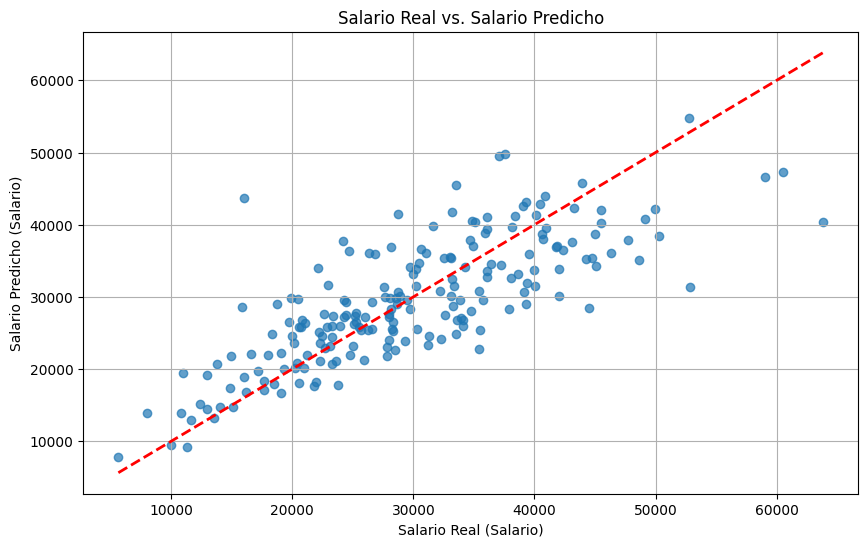

In [ ]:
#Visualizamos valores reales vs los predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel(f'Salario Real (Salario)')
plt.ylabel(f'Salario Predicho (Salario)')
plt.title(f'Salario Real vs. Salario Predicho')
plt.grid(True)
plt.show()

Podemos ver que está la tendencia de los puntos a seguir la línea, por lo que el modelo es capaz de capturar una parte significativa de la variabilidad entre el salario y de realizar las predicciones razonables. Sin embargo, los puntos no están en perfecta alineación con la línea, lo que indica errores en las predicciones. Se observan algunos puntos por encima de la línea, lo que significa que el modelo predijo un salario menor al real, mientras que otros están por debajo (el modelo predijo un salario mayor al real).

## Segunda parte

El equipo que te ha compartido la información te ha proporcionado un nuevo archivo, el cual puedes descargar de este *link*: https://drive.google.com/file/d/1qZsrAcB-02Z-8RA6wHzG2ZpJvYOFrTwp/view?usp=sharing

Es exactamente el mismo archivo de la **parte 1**, aunque ahora incluye una nueva columna, llamada `Contratado`, la cual tiene un `1` si el postulante fue contratado y un `0` si no lo fue.

En esta parte deberás hacer un modelo de clasificación que pueda predecir si un postulante será contrato o no, de acuerdo con las variables que te han compartido.

### Criterios de evaluación:
- Modelar la regresión logística correctamente (**2 puntos**):
  - hacer _dummies_ a valores categóricos,
  - «splitear» _dataframe_,
  - estandarizar conjuntos,
  - aplicar modelo,
  - entrenar con conjunto de entrenamiento,
  - predecir con conjunto de pruebas.

> **Nota:** Si falta alguno de los 3 puntos finales (aplicar modelo, entrenar con conjunto de entrenamiento y predecir con conjunto de pruebas) se descontará **un punto**.

- Aplicar cuadro de confusión y medir la precisión (**2 puntos**).
- Graficar un mapa de calor del cuadro de confusión (**2 puntos**).

> **Nota:** Las gráficas generadas deberán tener título y rótulos en sus ejes, de lo contrario, se descontará **un punto**.

> En el caso de las métricas, deberás indicar qué significan; puedes hacerlo a través de un comentario o imprimiéndolo directamente en pantalla.


In [ ]:
df_2 = pd.read_csv('/content/drive/MyDrive/rrhh_2.csv')

In [ ]:
df_2.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario,Contratado
0,0.5,Analista,4,1,Bachillerato,13540,1
1,5.6,Analista,2,0,Licenciatura,31240,0
2,11.7,Analista,1,0,Licenciatura,63880,0
3,5.2,Analista,2,1,Licenciatura,29960,1
4,7.2,Coordinador,2,1,Licenciatura,34710,1


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
 6   Contratado   1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


In [ ]:
print(df_2.isnull().sum())

Experiencia    0
Posicion       0
Hijos          0
Casado         0
Educacion      0
Salario        0
Contratado     0
dtype: int64


In [ ]:
print(df_2.describe())

       Experiencia        Hijos       Casado       Salario   Contratado
count  1000.000000  1000.000000  1000.000000   1000.000000  1000.000000
mean      6.416200     1.453000     0.595000  30787.060000     0.518000
std       2.577612     1.208823     0.491138  11520.200049     0.499926
min       0.100000     0.000000     0.000000   5630.000000     0.000000
25%       4.600000     0.000000     0.000000  22557.500000     0.000000
50%       6.400000     1.000000     1.000000  29470.000000     1.000000
75%       8.100000     2.000000     1.000000  37922.500000     1.000000
max      15.200000     4.000000     1.000000  83470.000000     1.000000


In [ ]:
categorical_cols = ['Posicion', 'Educacion']

In [ ]:
# La variable "Salario" sigue tomandose como variable objetivo, por ende el resto de variables no categoricas se tratan como numéricas para el escalado
numerical_cols_to_scale = ['Experiencia', 'Hijos', 'Casado', 'Salario']
target_col = 'Contratado'

In [ ]:
for col in categorical_cols:
    print(f"\nColumna '{col}':")
    print(df_2[col].value_counts())

print(f"\nValores únicos y conteos para la variable objetivo '{target_col}':")
print(df_2[target_col].value_counts())



Columna 'Posicion':
Posicion
Analista       790
Coordinador    151
Gerente         59
Name: count, dtype: int64

Columna 'Educacion':
Educacion
Bachillerato    531
Licenciatura    369
Posgrado        100
Name: count, dtype: int64

Valores únicos y conteos para la variable objetivo 'Contratado':
Contratado
1    518
0    482
Name: count, dtype: int64


In [ ]:
# Creamos las dummy para variables categóricas específicas
df_processed_clf = pd.get_dummies(df_2, columns=categorical_cols, drop_first=True)

In [ ]:
# Separate X e y (Objetivo)
X = df_processed_clf.drop(target_col, axis=1)
y = df_processed_clf[target_col]

In [ ]:
# Dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [ ]:
print(f"\nX_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")


X_train: (800, 8)
X_test: (200, 8)
y_train: (800,)
y_test: (200,)


In [ ]:
# Iniciamos StandardScaler
scaler = StandardScaler()

In [ ]:
X_train[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])


In [ ]:
X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])


In [ ]:
print("\nX_train después del escalado:")
print(X_train.head())
print("\nX_test después del escalado:")
print(X_test.head())


X_train después del escalado:
     Experiencia     Hijos    Casado   Salario  Posicion_Coordinador  \
175    -0.814889 -0.372423  0.818625 -1.140248                 False   
522     0.170943  1.282789  0.818625 -0.222672                 False   
606     1.196209 -0.372423  0.818625  0.491683                 False   
55     -1.406389 -0.372423  0.818625 -0.753159                 False   
406     0.841310 -0.372423  0.818625  0.891088                 False   

     Posicion_Gerente  Educacion_Licenciatura  Educacion_Posgrado  
175             False                   False               False  
522             False                   False               False  
606             False                    True               False  
55              False                    True               False  
406             False                   False               False  

X_test después del escalado:
     Experiencia     Hijos    Casado   Salario  Posicion_Coordinador  \
469    -0.223390 -0.372423

# Entrenamiento y predicción del modelo

In [ ]:
model_clf = LogisticRegression(random_state=123, solver='liblinear')
model_clf.fit(X_train, y_train)

LogisticRegression(random_state=123, solver='liblinear')

In [ ]:
# Hacemos las predicciones sobre el conjunto de prueba
y_pred_clf = model_clf.predict(X_test)

# Evaluación del modelo y visualización

In [ ]:
# Generamos el cuadro de confusión
cm = confusion_matrix(y_test, y_pred_clf)
print("\nCuadro de Confusión:")
print(cm)


Cuadro de Confusión:
[[71 25]
 [23 81]]


- Se observan 71 postulantes como Verdaderos negativos (TN), es decir que no contratados fueron predichos como no contratados.
- Se observan 25 postulantes como Falsos Positivos (TP), es decir que no contratados se predijeron erroneamente como contratados.
- Se observan 23 postulantes como Falsos Negativos (FN), es decir que contratados fueron predichos incorrectamente como no contratados
- Se observan 81 postulantes como Verdaderos Positivos (TP), es decir que contratados fueron predichos correctamente como contratados.

In [ ]:
# Calculamos la precisión
accuracy = accuracy_score(y_test, y_pred_clf)
print(f"\nPrecisión del Modelo: {accuracy:.2f}")


Precisión del Modelo: 0.76


Observamos que el 76% de las predicciones del modelo fueron correctas.

# Mapa de calor de cuadro de confusión

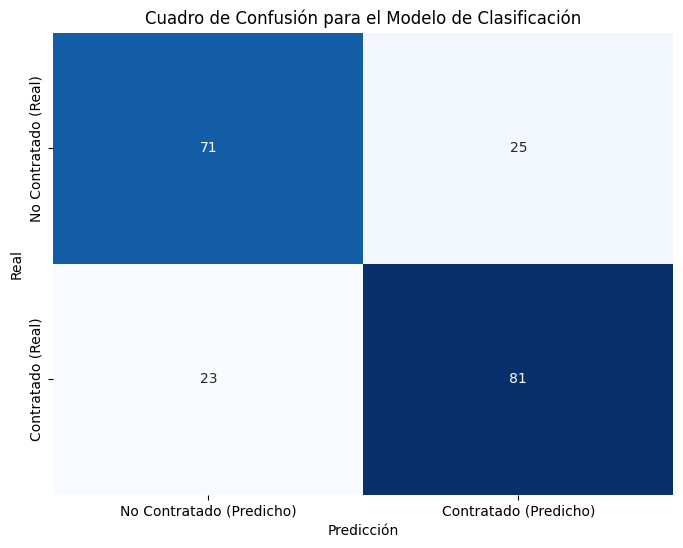

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Contratado (Predicho)', 'Contratado (Predicho)'],
            yticklabels=['No Contratado (Real)', 'Contratado (Real)'])
plt.title('Cuadro de Confusión para el Modelo de Clasificación')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

Se puede concluir que el modelo tiene una precisión razonable, sin embargo los FP y FN sugieren un margen de mejora. Dependiendo del costo que tenga cada tipo de error se ve la necesidad de ajustar el umbral de decisión del modelo.